Подключение модулей

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [9]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [11]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ... 

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df = df.drop("Age", axis=1)

In [14]:
df = df.drop("Cabin", axis=1)

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.0,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.0,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.0,2.0000,3.0000,3.0,3.0000
Sex,889.0,0.350956,0.477538,0.0,0.0000,0.0000,1.0,1.0000
SibSp,889.0,0.524184,1.103705,0.0,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.0,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.0,7.8958,14.4542,31.0,512.3292
Embarked,889.0,0.362205,0.636157,0.0,0.0000,0.0000,1.0,2.0000


Выявление выбросов

In [18]:
num_columns = ["PassengerId", "Pclass", "SibSp", "Fare", "Parch"]

In [19]:
df[num_columns].describe()

,PassengerId,Pclass,SibSp,Fare,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,0.524184,32.096681,0.382452
std,256.998173,0.834700,1.103705,49.697504,0.806761
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,0.000000,7.895800,0.000000
50%,446.000000,3.000000,0.000000,14.454200,0.000000
75%,668.000000,3.000000,1.000000,31.000000,0.000000
max,891.000000,3.000000,8.000000,512.329200,6.000000


Просмотрим графики для анализа

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Зависимость выживания от пола

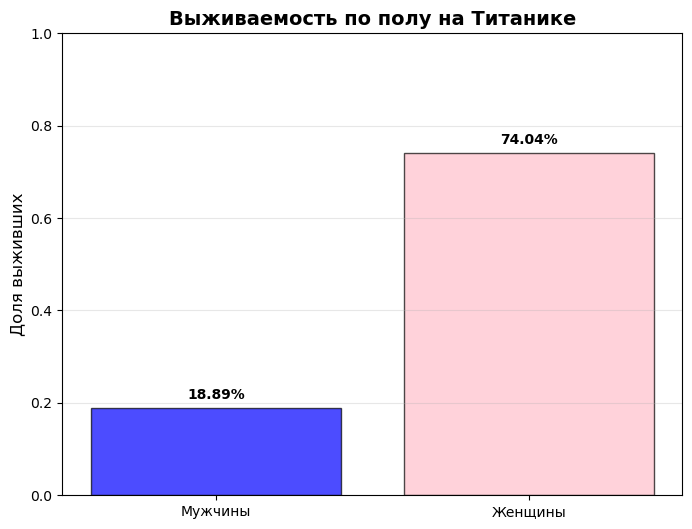

In [21]:
plt.figure(figsize=(8, 6))
survival_by_sex = df.groupby('Sex')['Survived'].mean()
colors = ['blue', 'pink']
plt.bar(['Мужчины', 'Женщины'], survival_by_sex.values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Выживаемость по полу на Титанике', fontsize=14, fontweight='bold')
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_by_sex.values):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.show()

Наглядно видно, что женщины выжили больше из-за того, что именно их спасали в первую очередь

Выживаемость по классу

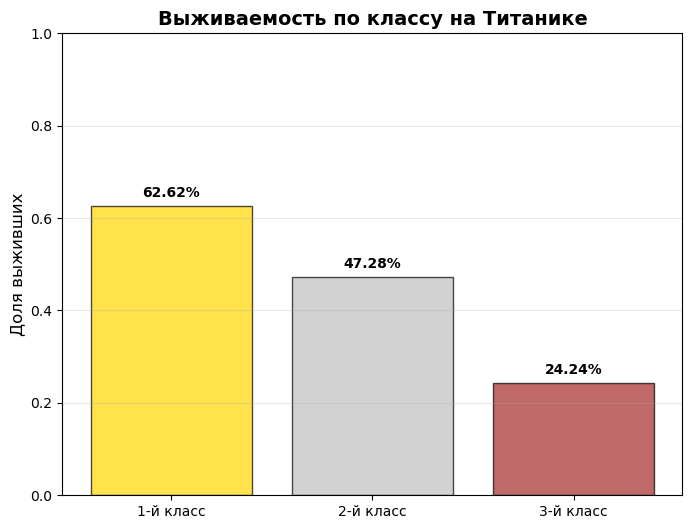

In [25]:
plt.figure(figsize=(8, 6))
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.bar(['1-й класс', '2-й класс', '3-й класс'], survival_by_class.values, 
        color=['gold', 'silver', 'brown'], alpha=0.7, edgecolor='black')
plt.title('Выживаемость по классу на Титанике', fontsize=14, fontweight='bold')
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_by_class.values):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.show()

Возможно первый класс был лучше обустроен по безопасности

Выживаемость по порту посадки

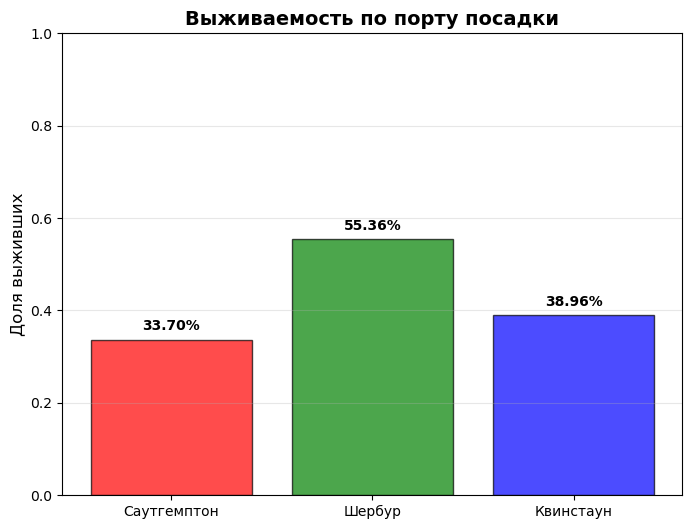

In [28]:
plt.figure(figsize=(8, 6))
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
plt.bar(['Саутгемптон', 'Шербур', 'Квинстаун'], survival_by_embarked.values, 
        color=['red', 'green', 'blue'], alpha=0.7, edgecolor='black')
plt.title('Выживаемость по порту посадки', fontsize=14, fontweight='bold')
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_by_embarked.values):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.show()

Распределение стоимости билета

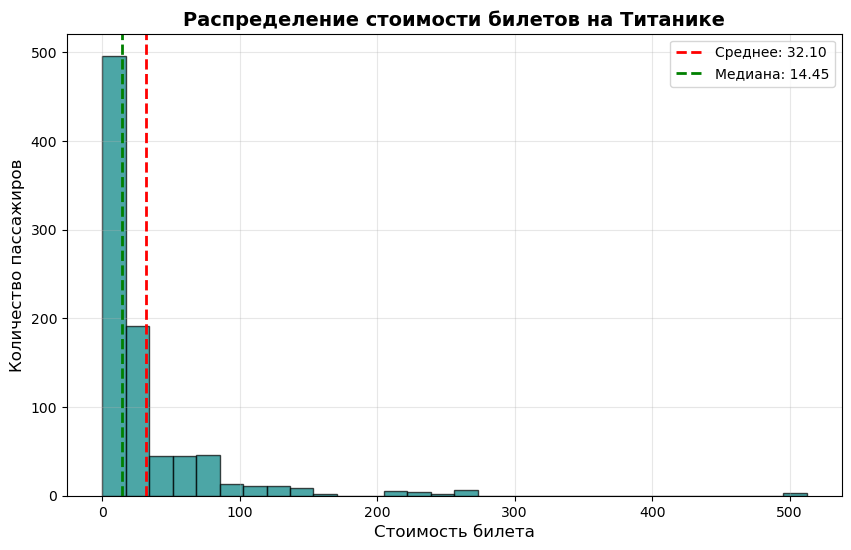

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'], bins=30, edgecolor='black', alpha=0.7, color='teal')
plt.title('Распределение стоимости билетов на Титанике', fontsize=14, fontweight='bold')
plt.xlabel('Стоимость билета', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(alpha=0.3)
plt.axvline(df['Fare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df["Fare"].mean():.2f}')
plt.axvline(df['Fare'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {df["Fare"].median():.2f}')
plt.legend()
plt.show()

Количество родственников на борту

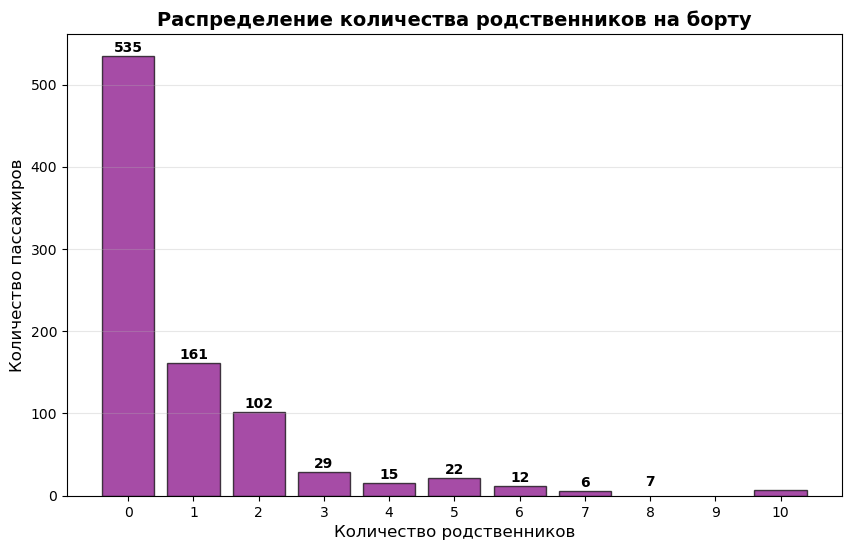

In [32]:
plt.figure(figsize=(10, 6))
family_size = df['SibSp'] + df['Parch']
family_counts = family_size.value_counts().sort_index()
plt.bar(family_counts.index, family_counts.values, color='purple', alpha=0.7, edgecolor='black')
plt.title('Распределение количества родственников на борту', fontsize=14, fontweight='bold')
plt.xlabel('Количество родственников', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(int(family_counts.index.max()) + 1))
for i, v in enumerate(family_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.show()

# 6. Корреляционная матрица


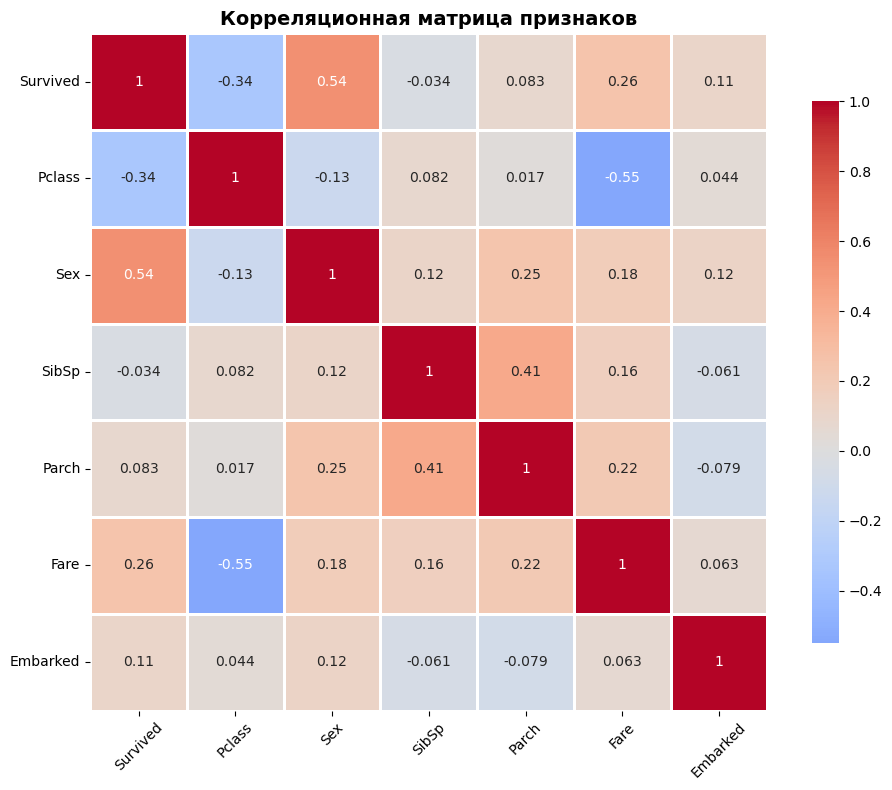

In [33]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Зависимость выживаемости от стоимости билета

C:\Users\dinislam\AppData\Local\Temp\ipykernel_5212\2516551479.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_Category')['Survived'].mean()


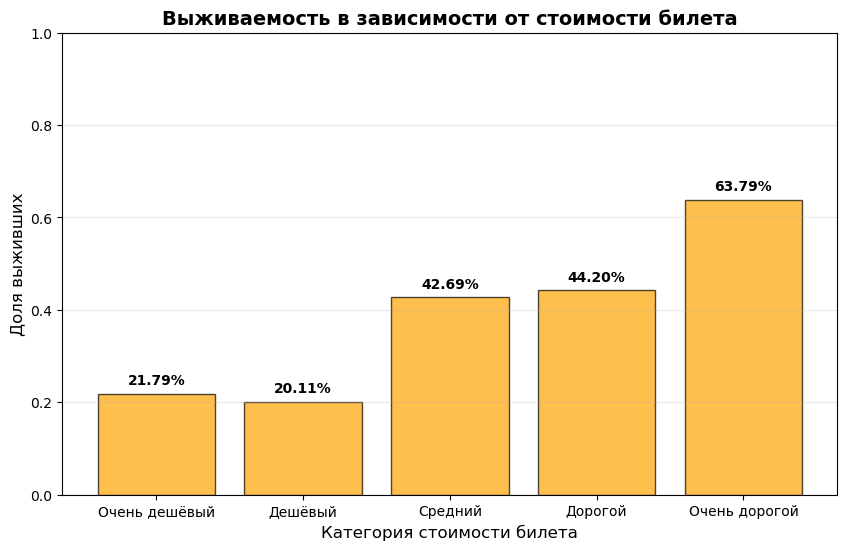

In [34]:
plt.figure(figsize=(10, 6))
df['Fare_Category'] = pd.qcut(df['Fare'], q=5, labels=['Очень дешёвый', 'Дешёвый', 'Средний', 'Дорогой', 'Очень дорогой'])
fare_survival = df.groupby('Fare_Category')['Survived'].mean()

plt.bar(fare_survival.index, fare_survival.values, color='orange', alpha=0.7, edgecolor='black')
plt.title('Выживаемость в зависимости от стоимости билета', fontsize=14, fontweight='bold')
plt.xlabel('Категория стоимости билета', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(fare_survival.values):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.show()

Выживаемость по количеству родственников

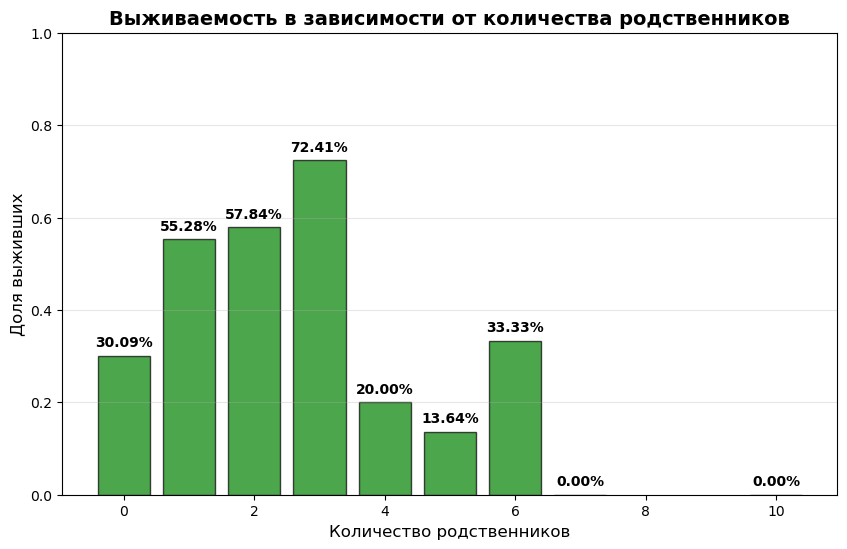

In [35]:
plt.figure(figsize=(10, 6))
family_survival = df.groupby(family_size)['Survived'].mean()

plt.bar(family_survival.index, family_survival.values, color='green', alpha=0.7, edgecolor='black')
plt.title('Выживаемость в зависимости от количества родственников', fontsize=14, fontweight='bold')
plt.xlabel('Количество родственников', fontsize=12)
plt.ylabel('Доля выживших', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(family_survival.values):
    plt.text(family_survival.index[i], v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.show()

Формирование дата сета для обучения моделей

In [22]:
features_names = ["PassengerId", "Pclass", "SibSp", "Fare", "Parch", "Sex", "Embarked"]

In [23]:
X = df[features_names]

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0.0


In [149]:
Y = df["Survived"]

In [150]:
df["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [152]:
print(X_train, Y_train, X_test, Y_test)

     PassengerId  Pclass  SibSp     Fare  Parch  Sex  Embarked
6              7       1      0  51.8625      0    0       0.0
576          577       2      0  13.0000      0    1       0.0
445          446       1      0  81.8583      2    0       0.0
74            75       3      0  56.4958      0    0       0.0
670          671       2      1  39.0000      1    1       0.0
..           ...     ...    ...      ...    ...  ...       ...
107          108       3      0   7.7750      0    0       0.0
271          272       3      0   0.0000      0    0       0.0
862          863       1      0  25.9292      0    1       0.0
436          437       3      2  34.3750      2    1       0.0
103          104       3      0   8.6542      0    0       0.0

[595 rows x 7 columns] 6      0
576    1
445    1
74     1
670    1
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 595, dtype: int64      PassengerId  Pclass  SibSp      Fare  Parch  Sex  Embarked
281          28

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

KNeighborsClassifer (Классификация ближних соседей)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

CPU times: total: 0 ns
Wall time: 13.2 ms


KNeighborsClassifier()

In [160]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(Y_test[:20]))

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [164]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)
print('train accuracy: ', accuracy_score(Y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(Y_test, y_test_predict, normalize=True))

train accuracy:  0.7478991596638656
test accuracy:  0.5986394557823129


In [166]:
knn_accuracy = accuracy_score(Y_test, Y_test_predict, normalize=True)
knn_accuracy

0.5986394557823129

Вышло, что точность соседского ИИ получилось: 0.59

In [167]:
from sklearn.naive_bayes import GaussianNB

In [170]:
%%time

gnb = GaussianNB()
gnb.fit(X, Y)

CPU times: total: 15.6 ms
Wall time: 7.65 ms


GaussianNB()

In [172]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(Y_test[:20]))

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, gnb_pred_test)

0.782312925170068

У Gaussian Naive Bayes вышло 0.78

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 1.34 s
Wall time: 1.13 s


In [180]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(Y_test[:20]))

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [183]:
from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(Y_test, rfc_pred_test)
rfc_accuracy

0.7891156462585034

Random Forest Classifier : 0.78

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, Y_train)

CPU times: total: 125 ms
Wall time: 207 ms


LogisticRegression(random_state=42)

In [190]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(Y_test[:20]))

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, lr_pred_test)

0.8061224489795918

In [194]:
lr_accuracy = accuracy_score(Y_test, lr_pred_test)

Logistic Regression : 0.80

In [195]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [196]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


In [197]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.598639
1,Gaussian Naive Bayes,0.782313
2,Random Forest Classifier,0.789116
3,Logistic Regression,0.806122


Тут у нас получилось, что Logistic Regression был самым лучшим при отгадывании выживших в титанике